In [1]:
# EDA

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [5]:
df_books = pd.read_csv('D:/STAT_766/project_books/Books.csv', low_memory=False)
print(df_books.shape)
df_books.head()

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
df_users = pd.read_csv('D:/STAT_766/project_books/Users.csv')
df_user.shape
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
df_rating = pd.read_csv('D:/STAT_766/project_books/Ratings.csv')
df_rating.head()
df_rating.shape

(1149780, 3)

In [9]:
df_rating.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [10]:
df_ratings = df_rating.sort_values(by=['User-ID'], ignore_index=True)

In [11]:
df_ratings

,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,7,034542252,0
2,8,0771025661,0
3,8,1881320189,7
4,8,1575663937,6
...,...,...,...
1149775,278854,0553579606,8
1149776,278854,0375703063,7
1149777,278854,0316184152,7
1149778,278854,042516098X,7


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(y='Book-Rating', data=df_ratings,ax=ax[0])
ax[0].set_title('Find outlier data in Rating Book column')
sns.boxplot(y='Age', data=df_users,ax=ax[1])
ax[1].set_title('Find outlier data in Age column')

In [12]:
user_uniq = df_ratings['User-ID'].unique()

In [15]:
len(user_uniq)

105283

In [16]:
book_uniq = df_ratings['ISBN'].unique()

In [17]:
len(book_uniq)

340556

In [18]:
import matplotlib.pyplot as plt

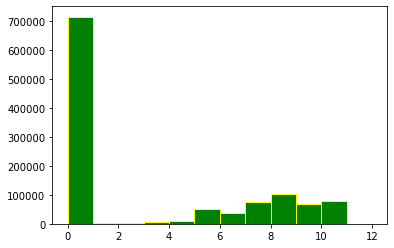

In [19]:
plt.hist(df_ratings['Book-Rating'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12], color="green", edgecolor="yellow")
plt.show()

In [20]:
df_ratings['Book-Rating'].unique()      # rating scale from 0 to 10, 0 is no rating at all I guess

array([ 0,  7,  6,  5, 10,  9,  3,  8,  4,  2,  1], dtype=int64)

In [21]:
df_ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [22]:
df_ratings_filtered = df_ratings[df_ratings['Book-Rating'] > 0]       # drop 0 which can be no rating at all
df_ratings_filtered

,User-ID,ISBN,Book-Rating
3,8,1881320189,7
4,8,1575663937,6
5,8,1567407781,6
7,8,1552041778,5
8,8,0887841740,5
...,...,...,...
1149774,278854,0425163393,7
1149775,278854,0553579606,8
1149776,278854,0375703063,7
1149777,278854,0316184152,7


In [23]:
df_ratings_filtered['ISBN'].value_counts().head(20)     # books received most ratings

0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
0060928336    320
059035342X    313
0142001740    307
0446672211    295
044023722X    281
0452282152    278
0316601950    272
0671027360    269
067976402X    256
0316769487    243
0786868716    242
0743418174    236
0345337662    230
0375727345    229
0312278586    226
Name: ISBN, dtype: int64

In [24]:
popular_books = df_ratings_filtered['ISBN'].value_counts()[:20].index.tolist()
list2

['0316666343',
 '0971880107',
 '0385504209',
 '0312195516',
 '0679781587',
 '0060928336',
 '059035342X',
 '0142001740',
 '0446672211',
 '044023722X',
 '0452282152',
 '0316601950',
 '0671027360',
 '067976402X',
 '0316769487',
 '0786868716',
 '0743418174',
 '0345337662',
 '0375727345',
 '0312278586']

In [25]:
df_popular_books = df_books[df_books['ISBN'].isin(popular_books)]
print(df_popular_books[['Book-Title', 'Book-Author']])

                                             Book-Title      Book-Author
26                                          Wild Animus     Rich Shapero
90                               The Catcher in the Rye    J.D. Salinger
107                  The Five People You Meet in Heaven      Mitch Albom
118                                 Angels &amp; Demons        Dan Brown
231                           Girl with a Pearl Earring  Tracy Chevalier
305                                     A Painted House     John Grisham
356                             The Secret Life of Bees    Sue Monk Kidd
408                           The Lovely Bones: A Novel     Alice Sebold
522                 The Red Tent (Bestselling Backlist)    Anita Diamant
541                          The Nanny Diaries: A Novel  Emma McLaughlin
706   Where the Heart Is (Oprah's Book Club (Paperba...     Billie Letts
748                                   The Da Vinci Code        Dan Brown
1105    Divine Secrets of the Ya-Ya Sisterhood: A N